In [31]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly"
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [32]:
df=pd.read_csv('data/2020-28thJuly_7cities.csv')
df.head(5)

,Date,Country,City,Specie,count,min,max,median,variance
0,30/12/2019,IN,Bengaluru,co,232,1.6,28.6,8.6,228.74
1,31/12/2019,IN,Bengaluru,co,217,0.4,29.7,8.9,287.50
2,01/01/2020,IN,Bengaluru,co,180,1.2,40.2,9.8,246.08
3,02/01/2020,IN,Bengaluru,co,192,0.2,60.3,9.3,570.86
4,03/01/2020,IN,Bengaluru,co,237,0.7,86.4,8.0,523.38


In [33]:
df['Specie'].unique()

array(['co', 'dew', 'humidity', 'no2', 'o3', 'pm10', 'pm25', 'pressure',
       'so2', 'temperature'], dtype=object)

In [34]:
#factor=['dew','humidity','pressure','temperature']
#df=df[df['Specie'].isin(factor)]
df.Date=pd.to_datetime(df.Date, format = '%d/%m/%Y')

In [35]:
dff=df[df['Specie'].isin(['temperature'])]
dfd=df[df['Specie'].isin(['dew'])]
dfp=df[df['Specie'].isin(['humidity'])]

In [36]:
df25 = df[df['Specie'].isin(['pm25'])]

In [44]:
dd=dff.merge(df25,on=['City','Date','Country'])
d=dfd.merge(df25,on=['City','Date','Country'])
d1=dfp.merge(df25,on=['City','Date','Country'])
d

,Date,Country,City,Specie_x,count_x,min_x,max_x,median_x,variance_x,Specie_y,count_y,min_y,max_y,median_y,variance_y
0,2020-01-03,IN,Bengaluru,dew,143,13.5,21.0,16.0,50.80,pm25,191,23.0,169.0,80.0,8594.95
1,2020-01-04,IN,Bengaluru,dew,241,12.0,21.5,17.4,100.25,pm25,189,29.0,220.0,137.0,14706.70
2,2020-01-05,IN,Bengaluru,dew,264,13.0,22.5,20.5,111.01,pm25,173,44.0,172.0,137.0,10167.40
3,2020-01-06,IN,Bengaluru,dew,236,17.0,22.0,20.5,18.64,pm25,177,16.0,134.0,72.0,4767.70
4,2020-01-07,IN,Bengaluru,dew,264,13.5,20.5,19.0,38.88,pm25,205,20.0,178.0,68.0,6909.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,2020-07-24,IN,Visakhapatnam,dew,15,24.0,26.0,25.0,4.81,pm25,24,58.0,151.0,90.0,6232.88
1347,2020-07-25,IN,Visakhapatnam,dew,15,25.0,26.0,25.5,1.95,pm25,24,46.0,153.0,79.0,19381.70
1348,2020-07-26,IN,Visakhapatnam,dew,21,24.5,27.0,26.0,5.64,pm25,24,47.0,104.0,72.0,2444.18
1349,2020-07-27,IN,Visakhapatnam,dew,22,25.0,27.0,26.0,4.18,pm25,24,60.0,129.0,89.0,4344.76


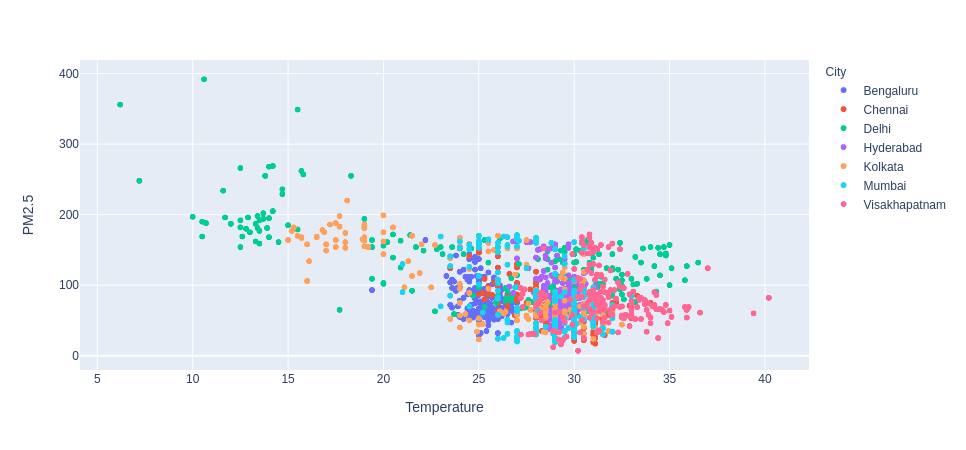

In [38]:
fig=px.scatter(dd,'median_x','median_y',color="City",labels={'median_x':'Temperature','median_y':'PM2.5'})
fig.show()
fig.write_image(f'images/pm2.5_temperature.png')

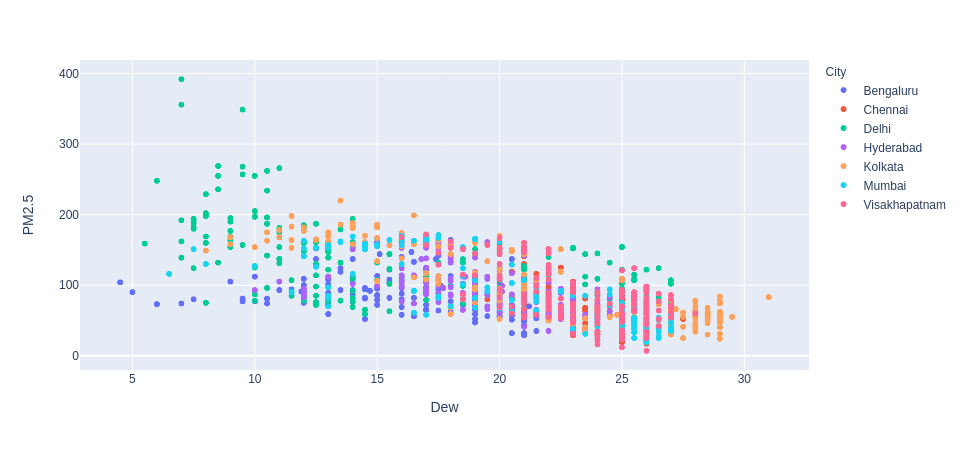

In [39]:
fig=px.scatter(d,'median_x','median_y',color="City",labels={'median_x':'Dew','median_y':'PM2.5'})
fig.show()
fig.write_image(f'images/pm2.5_dew.png')

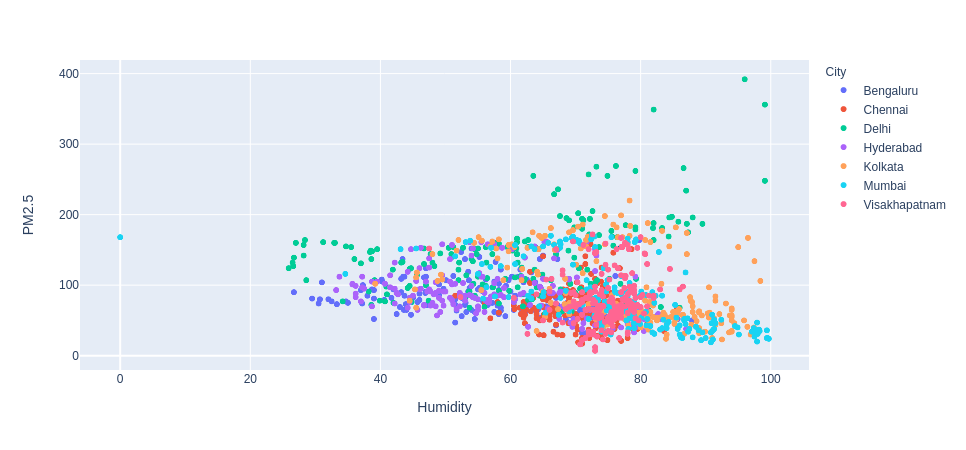

In [40]:
fig=px.scatter(d1,'median_x','median_y',color="City",labels={'median_x':'Humidity','median_y':'PM2.5'})
fig.show()
fig.write_image(f'images/pm2.5_humidity.png')

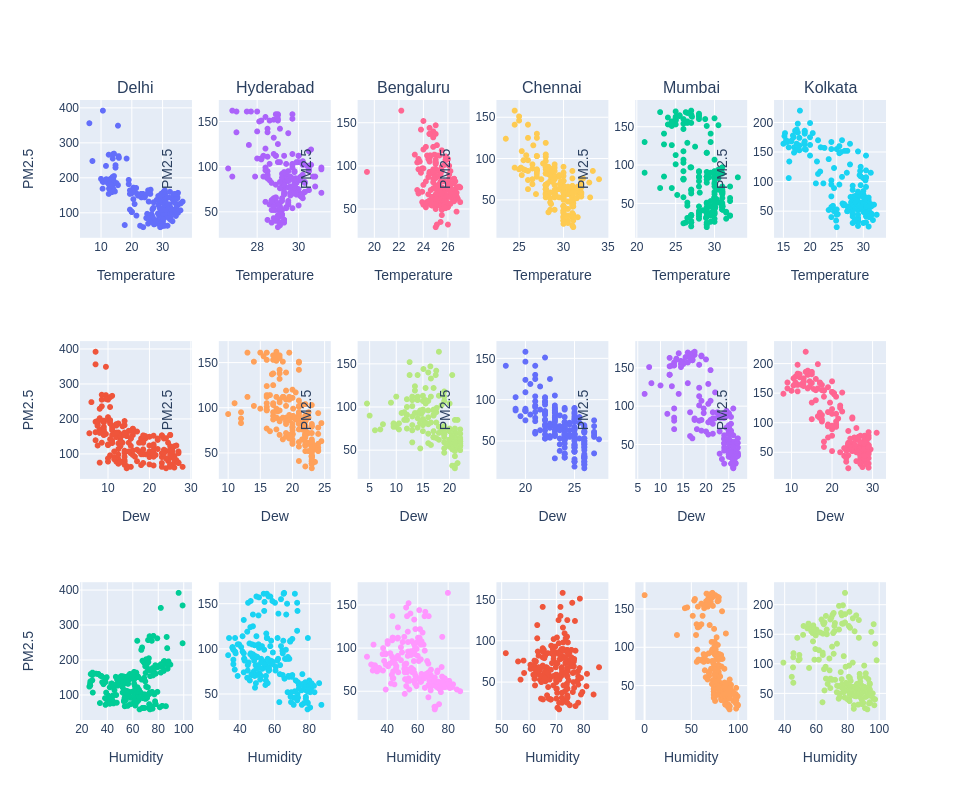

In [66]:
dfenv=df[df['Specie'].isin(['humidity','dew','temperature'])]
city=['Delhi','Hyderabad','Bengaluru','Chennai','Mumbai','Kolkata']
fig = make_subplots(
rows=3, cols=6,
subplot_titles=("Delhi", "Hyderabad", "Bengaluru", "Chennai",'Mumbai','Kolkata'))
for l,i in enumerate(city):
    qw=dd[dd['City'].isin([i])]
    qe=d[d['City'].isin([i])]
    qr=d1[d1['City'].isin([i])]
    fig.add_trace(go.Scatter(x=qw['median_x'],y=qw['median_y'],mode='markers'),row=1,col=l+1)
    fig.update_xaxes(title_text="Temperature", row=1, col=l+1)
    fig.update_yaxes(title_text="PM2.5", row=1, col=l+1)
    fig.add_trace(go.Scatter(x=qe['median_x'],y=qe['median_y'],mode='markers'),row=2,col=l+1)
    fig.update_xaxes(title_text="Dew", row=2, col=l+1)
    fig.update_yaxes(title_text="PM2.5", row=2, col=l+1)
    fig.add_trace(go.Scatter(x=qr['median_x'],y=qr['median_y'],mode='markers'),row=3,col=l+1)
    fig.update_xaxes(title_text="Humidity", row=3, col=l+1)
    fig.update_yaxes(title_text="PM2.5", row=3, col=1)
fig.update_layout(height=800, width=2000,showlegend=False)
fig.show()
fig.write_image(f'images/pm2.5_env.png')